In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow #this is used for imshow to work on google colab

## Παράδειγμα 1: Gaussian φίλτρο

In [5]:
def create_gaussian_kernel(size, sigma):
    """Create an isotropic Gaussian kernel"""
    ax = np.linspace(-(size-1)/2., (size-1)/2., size)
    xx, yy = np.meshgrid(ax, ax)

    kernel = np.exp(-(xx**2 + yy**2)/(2.*sigma**2))
    return kernel / kernel.sum()


In [6]:
# Example 5x5 Gaussian kernel
gaussian_5x5 = create_gaussian_kernel(5, 1.0)

In [7]:
gaussian_5x5

array([[0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.02193823, 0.09832033, 0.16210282, 0.09832033, 0.02193823],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902]])

## Παράδειγμα 2: High-pass Laplacian filter

In [8]:
# 4-connectivity Laplacian (isotropic)
laplacian_4 = np.array([
    [0,  1, 0],
    [1, -4, 1],
    [0,  1, 0]
])

# 8-connectivity Laplacian (isotropic)
laplacian_8 = np.array([
    [1,  1, 1],
    [1, -8, 1],
    [1,  1, 1]
])

In [10]:
laplacian_4

array([[ 1,  1,  1],
       [ 1, -8,  1],
       [ 1,  1,  1]])

In [11]:
laplacian_8

array([[ 1,  1,  1],
       [ 1, -8,  1],
       [ 1,  1,  1]])

## Έλεγχος φίλτρου για ισοτροπικό


In [13]:
def test_filter_isotropy(kernel):
    """
    Test if a filter is isotropic by rotating it and comparing responses
    """
    # Create a test pattern (circle)
    size = 100
    center = size // 2
    y, x = np.ogrid[:size, :size]
    circle = ((x - center)**2 + (y - center)**2 <= 20**2).astype(float)

    # Original response
    original = cv2.filter2D(circle, -1, kernel)

    # Test rotations
    angles = [30, 45, 60, 90]
    responses = []

    for angle in angles:
        # Rotate image
        M = cv2.getRotationMatrix2D((center, center), angle, 1.0)
        rotated = cv2.warpAffine(circle, M, (size, size))

        # Filter rotated image
        response = cv2.filter2D(rotated, -1, kernel)

        # Rotate back for comparison
        M = cv2.getRotationMatrix2D((center, center), -angle, 1.0)
        response = cv2.warpAffine(response, M, (size, size))

        responses.append(response)

    # Compare responses
    differences = [np.max(np.abs(original - resp)) for resp in responses]
    return np.max(differences)

In [16]:
test_filter_isotropy(gaussian_5x5)

0.05252213819616765

## Εφαρμογές - Image Smoothing

In [6]:
def isotropic_smoothing(image, size=5, sigma=1.0):
    kernel = create_gaussian_kernel(size, sigma)
    return cv2.filter2D(image, -1, kernel)

## Edge Detection

In [7]:
def isotropic_edge_detection(image):
    return cv2.Laplacian(image, cv2.CV_64F)

## Blob Detection

In [8]:
def create_log_kernel(size, sigma):
    """Laplacian of Gaussian kernel"""
    ax = np.linspace(-(size-1)/2., (size-1)/2., size)
    xx, yy = np.meshgrid(ax, ax)

    # LoG equation
    kernel = -(1/np.pi/sigma**4) * (1 - (xx**2 + yy**2)/(2*sigma**2)) * \
             np.exp(-(xx**2 + yy**2)/(2*sigma**2))
    return kernel

## Visual Demo

In [19]:
def demonstrate_isotropy():
    # Create test patterns
    size = 100
    center = size // 2

    # Circle pattern
    y, x = np.ogrid[:size, :size]
    circle = ((x - center)**2 + (y - center)**2 <= 20**2).astype(float)

    # Apply isotropic and non-isotropic filters
    gaussian = create_gaussian_kernel(5, 1.0)
    sobel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

    iso_response = cv2.filter2D(circle, -1, gaussian)
    noniso_response = cv2.filter2D(circle, -1, sobel)

    return circle, iso_response, noniso_response

(-0.5, 99.5, 99.5, -0.5)

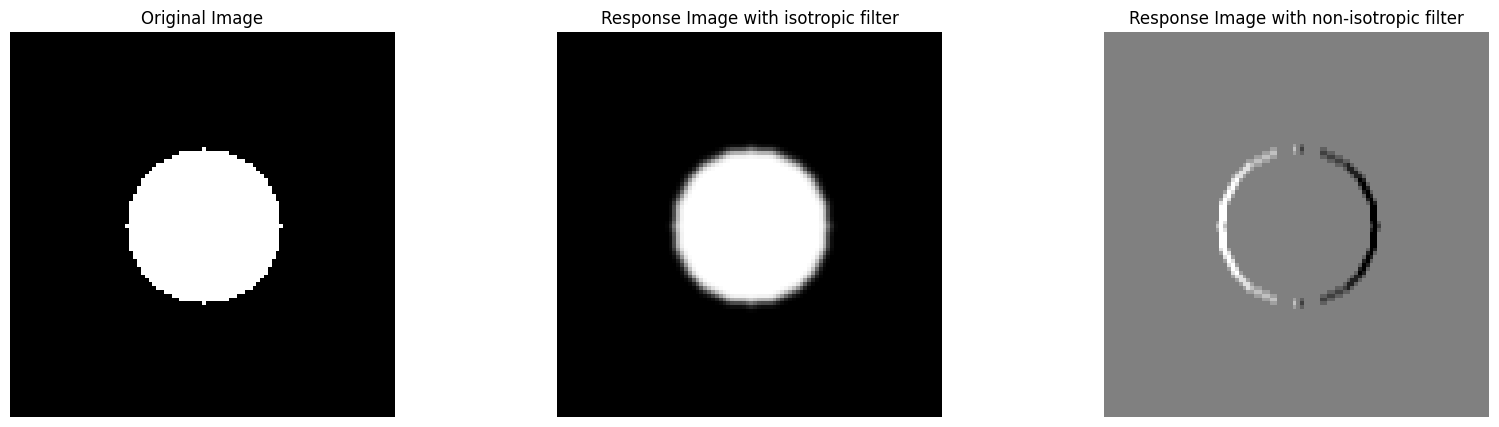

In [23]:
circle, iso_response, noniso_response = demonstrate_isotropy()

plt.figure(figsize=(20, 5))
# Plot original
plt.subplot(131)
plt.imshow(circle, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(132)
plt.imshow(iso_response, cmap='gray')
plt.title('Response Image with isotropic filter')
plt.axis('off')
plt.subplot(133)
plt.imshow(noniso_response, cmap='gray')
plt.title('Response Image with non-isotropic filter')
plt.axis('off')
